# K-Prototypes

In [ ]:
#!pip install kmodes

## Import Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder


In [40]:
df = pd.read_csv('Data/sampled_dataset.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

In [45]:
categorical_cols = [
    "General_hearing_condition",
    "Had_high_blood_pressure",
    "Gender",
    "Race_Ethnicity",
    "Country_of_Birth",
    "Education_Level",
    "Marital_Status",
    "Has_diabetes",
    "Takes_vitamin_supplements",
    "Has_Disability",
    "Has_Hepatitis",
    "Covered_by_health_insurance",
    "Tested_for_HIV_Virus",
    "General_health_condition",
    "Received_Hepatitis_A_Vaccine",
    "Has_Kidney_Failure",
    "Had_Asthma",
    "Had_Arthritis",
    "Had_heart_attack",
    "Had_Thyroid",
    "Had_Liver_COndition",
    "Had_Cancer",
    "Teeth_and_gum_health",
    "functional_difficulty_composite",
    "Age_Group"
]

numerical_cols = [col for col in df.columns if col not in categorical_cols]


## Encoding

In [47]:
df = df.replace({
    "Don't know": "Unknown",
    "Refused": "Unknown",
    "Not Applicable": "Unknown",
    "N/A": "Unknown",
    "Unknown/NA": "Unknown"
})

In [50]:
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # save encoder for later decoding


In [51]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


## Find K

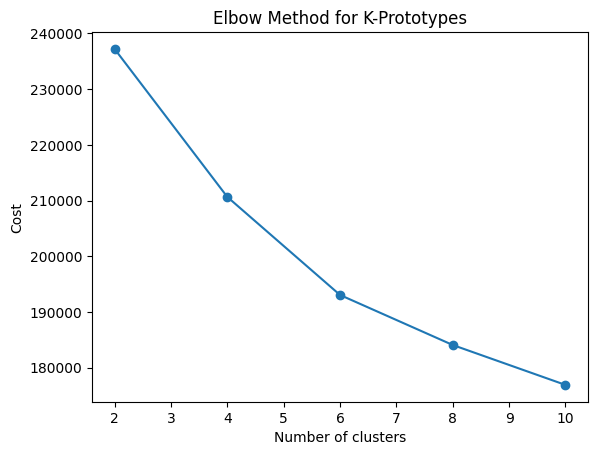

In [54]:
cost = []
K = [2, 4, 6, 8, 10]

for k in K:
    kproto = KPrototypes(n_clusters=k, init='Cao', verbose=0, random_state=42)
    clusters = kproto.fit_predict(matrix, categorical=cat_idx)
    cost.append(kproto.cost_)

import matplotlib.pyplot as plt

plt.plot(K, cost, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Cost")
plt.title("Elbow Method for K-Prototypes")
plt.show()


## K-Prototypes for different cluster sizes

In [61]:
from kmodes.kprototypes import KPrototypes

# Convert to numpy
matrix = df.to_numpy()

# Find categorical indices
cat_idx = [df.columns.get_loc(col) for col in categorical_cols]

# Train on full dataset with multiple initializations for stability
kproto = KPrototypes(
    n_clusters=4,  # change to 6 if you want
    init='Cao',
    verbose=1,
    n_init=5,       # more initializations = more stable
    max_iter=100,   # default iterations
    random_state=42
)

clusters = kproto.fit_predict(matrix, categorical=cat_idx)

# Save cluster labels
df['Cluster_4'] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3679, ncost: 214999.8977123099
Run: 1, iteration: 2/100, moves: 821, ncost: 213102.2134541832
Run: 1, iteration: 3/100, moves: 163, ncost: 213032.02902207928
Run: 1, iteration: 4/100, moves: 81, ncost: 212997.47019351498
Run: 1, iteration: 5/100, moves: 54, ncost: 212988.8595344777
Run: 1, iteration: 6/100, moves: 25, ncost: 212986.32951805243
Run: 1, iteration: 7/100, moves: 16, ncost: 212985.53294175255
Run: 1, iteration: 8/100, moves: 21, ncost: 212966.18180000523
Run: 1, iteration: 9/100, moves: 96, ncost: 212921.289467646
Run: 1, iteration: 10/100, moves: 88, ncost: 212904.2834956961
Run: 1, iteration: 11/100, moves: 28, ncost: 212901.8671648612
Run: 1, iteration: 12/100, moves: 10, ncost: 212901.47739382082
Run: 1, iteration: 13/100, moves: 4, ncost: 212901.37272753954
Run: 1, iteration: 14/100

In [ ]:
#!pip install gower

In [65]:
from kmodes.kprototypes import KPrototypes

# Convert to numpy
matrix = df.to_numpy()

# Find categorical indices
cat_idx = [df.columns.get_loc(col) for col in categorical_cols]

# Train on full dataset with multiple initializations for stability
kproto = KPrototypes(
    n_clusters=5,  # change to 6 if you want
    init='Cao',
    verbose=1,
    n_init=5,       # more initializations = more stable
    max_iter=100,   # default iterations
    random_state=42
)

clusters = kproto.fit_predict(matrix, categorical=cat_idx)

# Save cluster labels
df['Cluster_5'] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3740, ncost: 226157.36869851037
Run: 1, iteration: 2/100, moves: 2165, ncost: 216324.0649893029
Run: 1, iteration: 3/100, moves: 1894, ncost: 207239.59382456783
Run: 1, iteration: 4/100, moves: 826, ncost: 205284.06105081888
Run: 1, iteration: 5/100, moves: 99, ncost: 205241.16543870207
Run: 1, iteration: 6/100, moves: 0, ncost: 205241.16543870207
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 5007, ncost: 233420.6161876859
Run: 2, iteration: 2/100, moves: 1962, ncost: 226977.8019422628
Run: 2, iteration: 3/100, moves: 372, ncost: 226712.09095815246
Run: 2, iteration: 4/100, moves: 351, ncost: 226102.42047785147
Run: 2, iteration: 5/100, moves: 916, ncost: 219748.43111331505
Run: 2, iteration: 6/100, moves: 626, ncost: 215497.09246293


In [66]:
from kmodes.kprototypes import KPrototypes

# Convert to numpy
matrix = df.to_numpy()

# Find categorical indices
cat_idx = [df.columns.get_loc(col) for col in categorical_cols]

# Train on full dataset with multiple initializations for stability
kproto = KPrototypes(
    n_clusters=6,  # change to 6 if you want
    init='Cao',
    verbose=1,
    n_init=5,       # more initializations = more stable
    max_iter=100,   # default iterations
    random_state=42
)

clusters = kproto.fit_predict(matrix, categorical=cat_idx)

# Save cluster labels
df['Cluster_6'] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 5819, ncost: 217906.77557171017
Run: 1, iteration: 2/100, moves: 2918, ncost: 203014.26765509855
Run: 1, iteration: 3/100, moves: 556, ncost: 202667.99904575918
Run: 1, iteration: 4/100, moves: 271, ncost: 202421.9541551541
Run: 1, iteration: 5/100, moves: 246, ncost: 202276.5990628706
Run: 1, iteration: 6/100, moves: 162, ncost: 202195.35805792193
Run: 1, iteration: 7/100, moves: 111, ncost: 202149.75638710568
Run: 1, iteration: 8/100, moves: 110, ncost: 202089.1868252003
Run: 1, iteration: 9/100, moves: 127, ncost: 202014.81193922972
Run: 1, iteration: 10/100, moves: 190, ncost: 201803.1859714235
Run: 1, iteration: 11/100, moves: 177, ncost: 201615.04568033948
Run: 1, iteration: 12/100, moves: 165, ncost: 201425.02400319013
Run: 1, iteration: 13/100, moves: 141, ncost: 201281.53304385795
Run: 1, it

In [82]:
from kmodes.kprototypes import KPrototypes

# Convert to numpy
matrix = df.to_numpy()

# Find categorical indices
cat_idx = [df.columns.get_loc(col) for col in categorical_cols]

# Train on full dataset with multiple initializations for stability
kproto = KPrototypes(
    n_clusters=3,  # change to 6 if you want
    init='Cao',
    verbose=1,
    n_init=5,       # more initializations = more stable
    max_iter=100,   # default iterations
    random_state=42
)

clusters = kproto.fit_predict(matrix, categorical=cat_idx)

# Save cluster labels
df['Cluster_3'] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 4608, ncost: 251500.86125795162
Run: 1, iteration: 2/100, moves: 756, ncost: 246877.66433227216
Run: 1, iteration: 3/100, moves: 0, ncost: 246877.66433227216
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 4355, ncost: 244376.44984782944
Run: 2, iteration: 2/100, moves: 506, ncost: 243317.60481769723
Run: 2, iteration: 3/100, moves: 3, ncost: 243317.46699119388
Run: 2, iteration: 4/100, moves: 0, ncost: 243317.46699119388
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 1745, ncost: 246958.14135541322
Run: 3, iteration: 2/100, moves: 54, ncost: 246877.66433227222
Run: 3, iteration: 3/100, moves: 0, ncost: 246877.66433227222
Init: initializing centroids
Init: initializing cl

In [83]:
from kmodes.kprototypes import KPrototypes

# Convert to numpy
matrix = df.to_numpy()

# Find categorical indices
cat_idx = [df.columns.get_loc(col) for col in categorical_cols]

# Train on full dataset with multiple initializations for stability
kproto = KPrototypes(
    n_clusters=2,  # change to 6 if you want
    init='Cao',
    verbose=1,
    n_init=5,       # more initializations = more stable
    max_iter=100,   # default iterations
    random_state=42
)

clusters = kproto.fit_predict(matrix, categorical=cat_idx)

# Save cluster labels
df['Cluster_2'] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3468, ncost: 283614.95614374796
Run: 1, iteration: 2/100, moves: 1275, ncost: 274091.2720308155
Run: 1, iteration: 3/100, moves: 0, ncost: 274091.2720308155
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 3191, ncost: 274576.9421860878
Run: 2, iteration: 2/100, moves: 215, ncost: 274091.2720308155
Run: 2, iteration: 3/100, moves: 0, ncost: 274091.2720308155
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 2281, ncost: 275626.98700878065
Run: 3, iteration: 2/100, moves: 384, ncost: 274091.9559042566
Run: 3, iteration: 3/100, moves: 6, ncost: 274091.27203081554
Run: 3, iteration: 4/100, moves: 0, ncost: 274091.27203081554
Init: initializing centroids
Init: initializing cluste

## Metrics

In [87]:
for col in ['Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6']:
    print(f"\nCluster distribution for {col}:")
    counts = df[col].value_counts().sort_index()
    percentages = (counts / counts.sum() * 100).round(2)
    
    summary = pd.DataFrame({
        'Cluster': counts.index,
        'Count': counts.values,
        'Percentage': percentages.values
    })
    print(summary)



Cluster distribution for Cluster_2:
   Cluster  Count  Percentage
0        0   5577       53.15
1        1   4915       46.85

Cluster distribution for Cluster_3:
   Cluster  Count  Percentage
0        0   4915       46.85
1        1   1748       16.66
2        2   3829       36.49

Cluster distribution for Cluster_4:
   Cluster  Count  Percentage
0        0   1375       13.11
1        1   1748       16.66
2        2   4203       40.06
3        3   3166       30.18

Cluster distribution for Cluster_5:
   Cluster  Count  Percentage
0        0   2455       23.40
1        1   1374       13.10
2        2   1748       16.66
3        3   2694       25.68
4        4   2221       21.17

Cluster distribution for Cluster_6:
   Cluster  Count  Percentage
0        0   2455       23.40
1        1   1748       16.66
2        2   1374       13.10
3        3    724        6.90
4        4   2050       19.54
5        5   2141       20.41


In [86]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import gower

# Drop the cluster columns to isolate your data
data = df.drop(columns=['Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6'], errors='ignore')
data_numeric = data.copy()

# --- Compute Gower distance (for Silhouette) ---
print("Computing Gower distance matrix...")
gower_dist = gower.gower_matrix(data_numeric)

results = []

# --- Loop over cluster sets ---
for c in ['Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6']:
    print(f"\nEvaluating {c}...")

    clusters = df[c].astype(int)

    # --- 1. Silhouette Score (based on Gower distance) ---
    sil_score = silhouette_score(gower_dist, clusters, metric='precomputed')

    # --- 2. Calinski–Harabasz Index (numeric data only) ---
    ch_score = calinski_harabasz_score(data_numeric, clusters)

    # --- 3. Davies–Bouldin Index ---
    db_score = davies_bouldin_score(data_numeric, clusters)

    # --- 4. Intra- vs Inter-cluster Distances ---
    intra_dists = []
    inter_dists = []
    for i in range(len(data_numeric)):
        same_cluster = np.where(clusters == clusters[i])[0]
        other_cluster = np.where(clusters != clusters[i])[0]
        intra_dists.append(np.mean(gower_dist[i, same_cluster]))
        inter_dists.append(np.mean(gower_dist[i, other_cluster]))

    avg_intra = np.mean(intra_dists)
    avg_inter = np.mean(inter_dists)
    separation_ratio = avg_inter / avg_intra  # higher = better separation

    results.append({
        'Cluster_Set': c,
        'Silhouette_Score': sil_score,
        'Calinski_Harabasz': ch_score,
        'Davies_Bouldin': db_score,
        'Avg_Intra_Cluster_Dist': avg_intra,
        'Avg_Inter_Cluster_Dist': avg_inter,
        'Separation_Ratio': separation_ratio
    })

# --- Display results ---
results_df = pd.DataFrame(results)
print("\nQuantitative Cluster Evaluation:")
print(results_df.to_string(index=False))


Computing Gower distance matrix...

Evaluating Cluster_2...

Evaluating Cluster_3...

Evaluating Cluster_4...

Evaluating Cluster_5...

Evaluating Cluster_6...

Quantitative Cluster Evaluation:
Cluster_Set  Silhouette_Score  Calinski_Harabasz  Davies_Bouldin  Avg_Intra_Cluster_Dist  Avg_Inter_Cluster_Dist  Separation_Ratio
  Cluster_2          0.099211         858.424262        3.369193                0.209982                0.234970          1.119003
  Cluster_3          0.148205         923.039322        3.502494                0.185919                0.238882          1.284868
  Cluster_4          0.151478         820.752785        2.984231                0.179142                0.238253          1.329971
  Cluster_5          0.133507         683.868269        3.210394                0.175268                0.234704          1.339113
  Cluster_6          0.123556         574.984034        3.384388                0.174728                0.233713          1.337577


## 3D UMAP VIZ

In [ ]:
import umap.umap_ as umap
import plotly.express as px

# --- Step 1: Encode categoricals for UMAP ---
data_encoded = data.copy()
for col in categorical_cols:
    data_encoded[col] = data_encoded[col].astype('category').cat.codes

# --- Step 2: 3D UMAP projection ---
reducer_3d = umap.UMAP(n_components=3, random_state=42)
embedding_3d = reducer_3d.fit_transform(data_encoded)

umap_df = pd.DataFrame(embedding_3d, columns=['UMAP_1', 'UMAP_2', 'UMAP_3'])
umap_df['Cluster_2'] = df['Cluster_2']
umap_df['Cluster_3'] = df['Cluster_3']
umap_df['Cluster_4'] = df['Cluster_4']
umap_df['Cluster_5'] = df['Cluster_5']
umap_df['Cluster_6'] = df['Cluster_6']

# --- Step 3: 3D Plots for all cluster variants ---
for c in ['Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6']:
    fig = px.scatter_3d(
        umap_df,
        x='UMAP_1', y='UMAP_2', z='UMAP_3',
        color=c,
        color_discrete_sequence=px.colors.qualitative.Set1,
        opacity=0.7,
        title=f"3D UMAP Visualization - {c}"
    )
    fig.show()


c:\Users\varsh\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



## 2D TSNE VIZ

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

# Use the already encoded data
tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
embedding_2d = tsne_2d.fit_transform(data_encoded)

tsne_df = pd.DataFrame(embedding_2d, columns=['TSNE_1', 'TSNE_2'])
tsne_df['Cluster_2'] = df['Cluster_2']
tsne_df['Cluster_3'] = df['Cluster_3']
tsne_df['Cluster_4'] = df['Cluster_4']
tsne_df['Cluster_5'] = df['Cluster_5']
tsne_df['Cluster_6'] = df['Cluster_6']

# Plot 2D t-SNE for each clustering
for c in ['Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6']:
    fig = px.scatter(
        tsne_df,
        x='TSNE_1',
        y='TSNE_2',
        color=c,
        color_discrete_sequence=px.colors.qualitative.Set1,
        opacity=0.7,
        title=f"2D t-SNE Visualization - {c}"
    )
    fig.show()


c:\Users\varsh\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



## Hierarchical Clustering on Cluster 2 and 3

In [95]:
from kmodes.kprototypes import KPrototypes

# Function to subcluster a single cluster into 2 subclusters
def subcluster_cluster(df, cluster_col, cluster_value, n_subclusters=2):
    subset = df[df[cluster_col] == cluster_value].copy()
    matrix = subset[numerical_cols + categorical_cols].to_numpy()
    cat_idx = [subset.columns.get_loc(c) for c in categorical_cols]

    # Fit K-Prototypes
    kproto = KPrototypes(
        n_clusters=n_subclusters,
        init='Cao',
        n_init=5,
        max_iter=100,
        verbose=0,
        random_state=42
    )
    labels = kproto.fit_predict(matrix, categorical=cat_idx)
    
    # Save subcluster labels in main df
    df.loc[subset.index, f'{cluster_col}_{cluster_value}_Subcluster'] = labels
    return df

# Subcluster the two large clusters
large_clusters = [2, 3]  # from Cluster_4
for cluster_val in large_clusters:
    df = subcluster_cluster(df, 'Cluster_4', cluster_val, n_subclusters=2)


In [96]:
# Create a new column 'Final_Cluster' based on subclusters
df['Final_Cluster'] = df['Cluster_4'].astype(str)  # default: original cluster as string

# Replace clusters 2 and 3 with their subclusters
for cluster_val in [2, 3]:
    subcluster_col = f'Cluster_4_{cluster_val}_Subcluster'
    df.loc[df['Cluster_4'] == cluster_val, 'Final_Cluster'] = (
        df.loc[df['Cluster_4'] == cluster_val, subcluster_col].apply(lambda x: f"{cluster_val}.{x}")
    )

# Check the distribution
print(df['Final_Cluster'].value_counts(normalize=True).round(2) * 100)


2.1.0    28.0
3.0.0    19.0
1        17.0
0        13.0
2.0.0    12.0
3.1.0    11.0
Name: Final_Cluster, dtype: float64


### TSNE VIZ

c:\Users\varsh\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



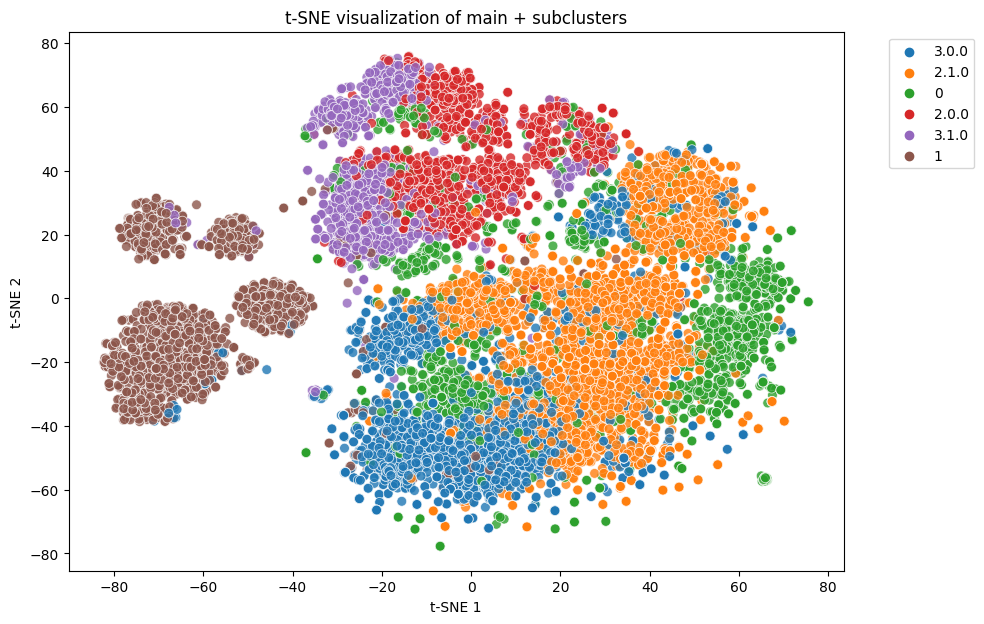

In [98]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Encode categorical columns as integers for t-SNE
df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# 2️⃣ Select features for t-SNE (numerical + encoded categorical)
features = numerical_cols + categorical_cols
X = df_encoded[features].to_numpy()

# 3️⃣ Fit t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_embedded = tsne.fit_transform(X)

# 4️⃣ Add t-SNE coordinates to dataframe
df['TSNE_1'] = X_embedded[:,0]
df['TSNE_2'] = X_embedded[:,1]

# 5️⃣ Plot
plt.figure(figsize=(10,7))
sns.scatterplot(
    x='TSNE_1', y='TSNE_2',
    hue='Final_Cluster',
    palette='tab10',
    data=df,
    legend='full',
    s=50,
    alpha=0.8
)
plt.title("t-SNE visualization of main + subclusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Breaking down cluster 2.1 further

In [99]:
# 1️⃣ Filter cluster 2.1.0
subset = df[df['Final_Cluster'] == '2.1.0'].copy()
matrix = subset[numerical_cols + categorical_cols].to_numpy()
cat_idx = [subset.columns.get_loc(c) for c in categorical_cols]

# 2️⃣ Fit K-Prototypes (2 subclusters)
kproto = KPrototypes(
    n_clusters=2,
    init='Cao',
    n_init=5,
    max_iter=100,
    verbose=0,
    random_state=42
)
labels = kproto.fit_predict(matrix, categorical=cat_idx)

# 3️⃣ Assign subcluster labels back to main dataframe
df.loc[subset.index, 'Final_Cluster'] = labels
df.loc[subset.index, 'Final_Cluster'] = df.loc[subset.index, 'Final_Cluster'].apply(lambda x: f'2.1.0.{x}')


### Final Cluster size percentages

In [100]:

# 4️⃣ Check the new distribution
print(df['Final_Cluster'].value_counts(normalize=True).round(2) * 100)

3.0.0      19.0
2.1.0.1    18.0
1          17.0
0          13.0
2.0.0      12.0
3.1.0      11.0
2.1.0.0     9.0
Name: Final_Cluster, dtype: float64


# Final TSNE with 7 clusters

c:\Users\varsh\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



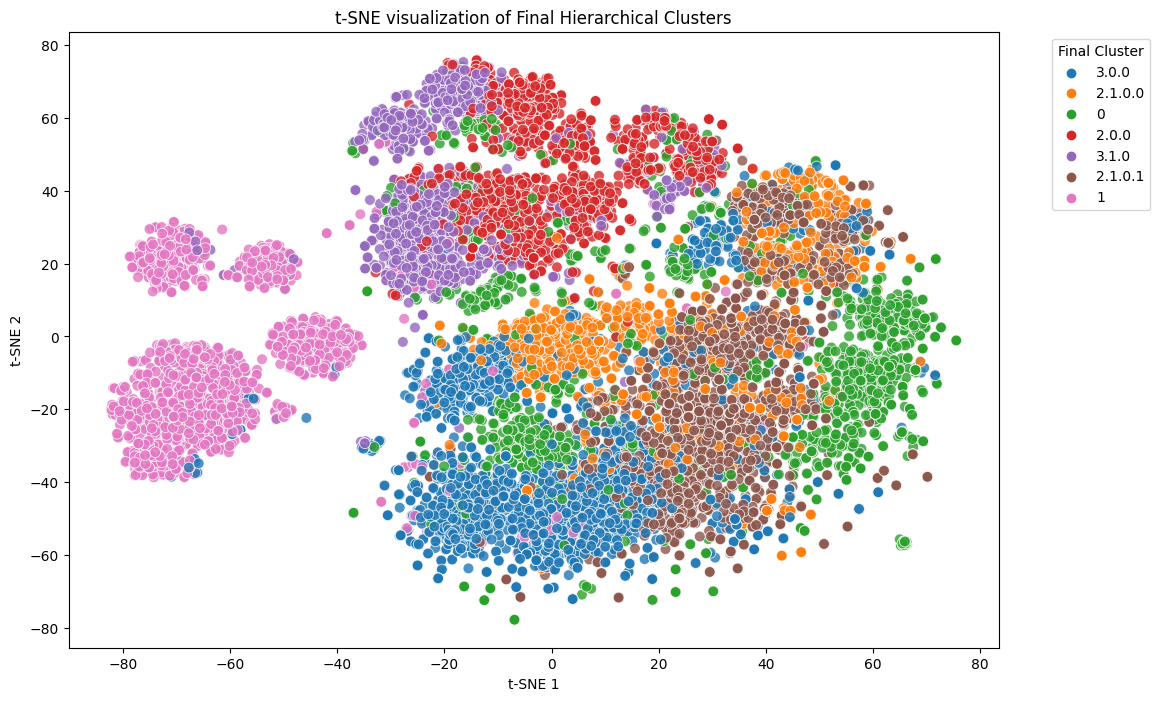

In [101]:
# 1️⃣ Encode categorical columns as integers for t-SNE
df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# 2️⃣ Select features for t-SNE (numerical + encoded categorical)
features = numerical_cols + categorical_cols
X = df_encoded[features].to_numpy()

# 3️⃣ Fit t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_embedded = tsne.fit_transform(X)

# 4️⃣ Add t-SNE coordinates to dataframe
df['TSNE_1'] = X_embedded[:,0]
df['TSNE_2'] = X_embedded[:,1]

# 5️⃣ Plot
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='TSNE_1', y='TSNE_2',
    hue='Final_Cluster',
    palette='tab10',  # adjust if you have more than 10 clusters
    data=df,
    legend='full',
    s=60,
    alpha=0.8
)
plt.title("t-SNE visualization of Final Hierarchical Clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Final Cluster')
plt.show()


In [103]:
# List of essential columns to keep
essential_cols = numerical_cols + categorical_cols + ['Final_Cluster', 'TSNE_1', 'TSNE_2']

# Drop everything else
df_clean = df[essential_cols].copy()

# Check
print(df_clean.columns)


Index(['WBC', 'Haemoglobin', 'Platelete', 'Age', 'Household_Size',
       'Income_to_Poverty_Ratio', 'HDL_mg', 'Family_poverty_level_index',
       'Number_of_Moderate_Physical_activities_per_week',
       'Number_of_Vigorous_Physical_activities_per_week',
       'Number_of_hours_of_sleep', 'Cholestrol_level', 'SystolicBP',
       'DiastolicBP', 'Pulse', 'BODY_MEASURE_COMPOSITE', 'blood_macros',
       'mean_steroid_ng_dl', 'balance_symptom_score', 'balance_impact_score',
       'fall_risk_score', 'General_hearing_condition',
       'Had_high_blood_pressure', 'Gender', 'Race_Ethnicity',
       'Country_of_Birth', 'Education_Level', 'Marital_Status', 'Has_diabetes',
       'Takes_vitamin_supplements', 'Has_Disability', 'Has_Hepatitis',
       'Covered_by_health_insurance', 'Tested_for_HIV_Virus',
       'General_health_condition', 'Received_Hepatitis_A_Vaccine',
       'Has_Kidney_Failure', 'Had_Asthma', 'Had_Arthritis', 'Had_heart_attack',
       'Had_Thyroid', 'Had_Liver_COndition', '